In [ ]:
# %load_ext autoreload
# %autoreload 2

In [1]:
from ultimatetictactoe import ultimatetictactoe
from utils.board import BoardRotation, BoardReflection
from rl.agent import RandomAgent, NeuralAgent, ManualAgent, Policy 
from rl.independent_algo.reinforce import *
# from algo.base_algo.base_algo import state_to_tensor

import torch
from torch import nn
import torch.optim as optim

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import random
import pygame

from rl.agent import state_to_tensor

In [2]:
DEVICE = torch.device("cuda")

In [3]:
env = ultimatetictactoe.env(render_mode="rgb_array")
env.reset(42)

envh = ultimatetictactoe.env(render_mode="human")
envh.reset()
# envh.render()

In [ ]:
eps = 0.3
a1 = NeuralAgent("player_1", epsilon=eps, learning_power=6, exploration_power=2) # max
a2 = NeuralAgent("player_2", epsilon=eps, learning_power=10.5, exploration_power=1)
am = ManualAgent("player_1")
ar = RandomAgent("player_2")
# a1.policy_net.load_state_dict(torch.load("rl/independent_algo/logs/checkpoints/local/2026_02_18_12_15_33/agent_1/model_1999.pt"))
# a2.policy_net.load_state_dict(torch.load("rl/independent_algo/logs/checkpoints/local/2026_02_18_12_15_33/agent_2/model_1999.pt"))

RuntimeError: Error(s) in loading state_dict for Policy:
	Missing key(s) in state_dict: "first_conv_net.0.weight", "first_conv_net.0.bias", "first_conv_net.1.weight", "first_conv_net.1.bias", "first_conv_net.1.running_mean", "first_conv_net.1.running_var", "first_conv_net.3.weight", "first_conv_net.3.bias", "first_conv_net.4.weight", "first_conv_net.4.bias", "first_conv_net.4.running_mean", "first_conv_net.4.running_var", "second_conv_net.0.weight", "second_conv_net.0.bias", "second_conv_net.1.weight", "second_conv_net.1.bias", "second_conv_net.1.running_mean", "second_conv_net.1.running_var", "second_conv_net.4.weight", "second_conv_net.4.bias", "second_conv_net.5.weight", "second_conv_net.5.bias", "second_conv_net.5.running_mean", "second_conv_net.5.running_var", "main_linear.2.weight", "main_linear.2.bias", "main_linear.4.weight", "main_linear.4.bias", "final_linear.weight", "final_linear.bias". 
	Unexpected key(s) in state_dict: "local_conv_net.0.weight", "local_conv_net.0.bias", "local_conv_net.2.weight", "local_conv_net.2.bias", "local_conv_net.4.weight", "local_conv_net.4.bias", "parallel_net.0.weight", "parallel_net.0.bias", "parallel_net.2.weight", "parallel_net.2.bias", "parallel_net.4.weight", "parallel_net.4.bias", "global_conv_net.0.weight", "global_conv_net.0.bias", "global_conv_net.3.weight", "global_conv_net.3.bias", "final_linear.2.weight", "final_linear.2.bias", "final_linear.4.weight", "final_linear.4.bias". 

# REINFORCE

In [6]:
a1.policy_net.train()
a2.policy_net.train()

Policy(
  (first_conv_net): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (second_conv_net): Sequential(
    (0): LazyConv2d(0, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): LazyConv2d(0, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (5): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (main_linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): LazyLinear(in_features

In [7]:
# a1.policy_net.to(DEVICE)
# a2.policy_net.to(DEVICE)

In [8]:
import warnings
warnings.simplefilter("always")


In [12]:
# training
# 10_000 1h 15m
a1_losses, a2_losses, a, b, c = reinforce(env, a1, a2, 6000, enable_swap=True, enable_transform=True, px=0, pt=0, checkpoint_rate=200, validation_rate=100, experiment_name="prova nuovo reinforce")

100%|██████████| 6000/6000 [37:43<00:00,  2.65it/s]  


In [19]:
import pickle

In [20]:
res = (a1_losses, a2_losses, a, b, c)

with open('file.pkl', 'wb') as file:
    pickle.dump(res, file)

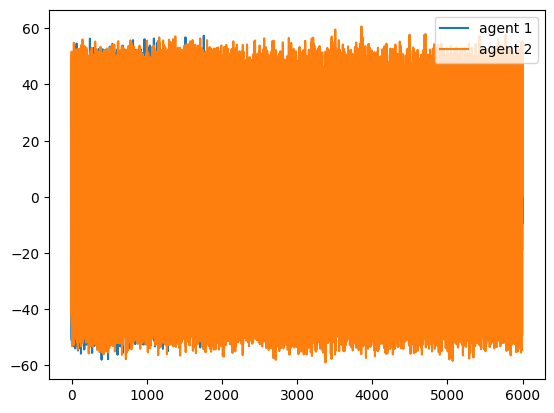

In [13]:
plt.plot(a1_losses, label="agent 1")
plt.plot(a2_losses, label="agent 2")
plt.legend()

# Stats

In [14]:
a1.mode = 'sample'
a2.mode = 'sample'
print('12')
sample_12 = compute_games(env, a1, a2, 500, True, False)
print('1R')
sample_1r = compute_games(env, a1, ar, 500, True, False)
print('2R')
sample_2r = compute_games(env, a2, ar, 500, True, False)

12
1R
2R


In [15]:
rrr = compute_games(env, ar, ar, 1000, True)

Game 1/1000
Game 2/1000
Game 3/1000
Game 4/1000
Game 5/1000
Game 6/1000
Game 7/1000
Game 8/1000
Game 9/1000
Game 10/1000
Game 11/1000
Game 12/1000
Game 13/1000
Game 14/1000
Game 15/1000
Game 16/1000
Game 17/1000
Game 18/1000
Game 19/1000
Game 20/1000
Game 21/1000
Game 22/1000
Game 23/1000
Game 24/1000
Game 25/1000
Game 26/1000
Game 27/1000
Game 28/1000
Game 29/1000
Game 30/1000
Game 31/1000
Game 32/1000
Game 33/1000
Game 34/1000
Game 35/1000
Game 36/1000
Game 37/1000
Game 38/1000
Game 39/1000
Game 40/1000
Game 41/1000
Game 42/1000
Game 43/1000
Game 44/1000
Game 45/1000
Game 46/1000
Game 47/1000
Game 48/1000
Game 49/1000
Game 50/1000
Game 51/1000
Game 52/1000
Game 53/1000
Game 54/1000
Game 55/1000
Game 56/1000
Game 57/1000
Game 58/1000
Game 59/1000
Game 60/1000
Game 61/1000
Game 62/1000
Game 63/1000
Game 64/1000
Game 65/1000
Game 66/1000
Game 67/1000
Game 68/1000
Game 69/1000
Game 70/1000
Game 71/1000
Game 72/1000
Game 73/1000
Game 74/1000
Game 75/1000
Game 76/1000
Game 77/1000
Game 78/

In [16]:
a1.mode = 'argmax'
a2.mode = 'argmax'
# print('12')
# argmax_12 = compute_games(env, a1, a2, 1000, True)
print('1R')
argmax_1r = compute_games(env, a1, ar, 500, True)
print('2R')
argmax_2r = compute_games(env, a2, ar, 500, True)

1R
Game 1/500

Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)

Game 2/500


c:\Users\andre\OneDrive\Desktop\UNI\magistrale\Reinforcement\multi_agent\venv\lib\site-packages\IPython\core\completerlib.py:150: UserWarning: This is now an optional IPython functionality, setting rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache


Game 3/500
Game 4/500
Game 5/500
Game 6/500
Game 7/500
Game 8/500
Game 9/500
Game 10/500
Game 11/500
Game 12/500
Game 13/500
Game 14/500
Game 15/500
Game 16/500
Game 17/500
Game 18/500
Game 19/500
Game 20/500
Game 21/500
Game 22/500
Game 23/500
Game 24/500
Game 25/500
Game 26/500
Game 27/500
Game 28/500
Game 29/500
Game 30/500
Game 31/500
Game 32/500
Game 33/500
Game 34/500
Game 35/500
Game 36/500
Game 37/500
Game 38/500
Game 39/500
Game 40/500
Game 41/500
Game 42/500
Game 43/500
Game 44/500
Game 45/500
Game 46/500
Game 47/500
Game 48/500
Game 49/500
Game 50/500
Game 51/500
Game 52/500
Game 53/500
Game 54/500
Game 55/500
Game 56/500
Game 57/500
Game 58/500
Game 59/500
Game 60/500
Game 61/500
Game 62/500
Game 63/500
Game 64/500
Game 65/500
Game 66/500
Game 67/500
Game 68/500
Game 69/500
Game 70/500
Game 71/500
Game 72/500
Game 73/500
Game 74/500
Game 75/500
Game 76/500
Game 77/500
Game 78/500
Game 79/500
Game 80/500
Game 81/500
Game 82/500
Game 83/500
Game 84/500
Game 85/500
Game 86/500

In [17]:
# argmax
print(rrr['results'], rrr['rewards'].mean())
print(sample_12['results'], sample_12['rewards'].mean())
print(sample_1r['results'], sample_1r['rewards'].mean())
print(sample_2r['results'], sample_2r['rewards'].mean())

[38.4 40.2 21.4] -0.0171
[41.2 37.  21.8] 0.0506
[43.6 37.  19.4] 0.0724
[42.8 36.4 20.8] 0.0634


In [18]:
# sample
# print(rp['results'], rp['rewards'].mean())
print(argmax_1r['results'], argmax_1r['rewards'].mean())
print(argmax_2r['results'], argmax_2r['rewards'].mean())

[40.2 40.6 19.2] -0.0015999999999999925
[39. 35. 26.] 0.038200000000000005


In [ ]:
plot_bar(sample_1r)

NameError: name 'plot_bar' is not defined

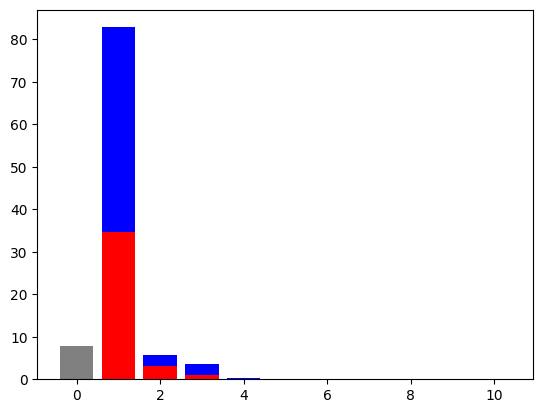

([0, 34.6, 3.2, 1.0, 0, 0, 0, 0, 0, 0, 0],
 [0, 48.2, 2.4000000000000004, 2.6, 0.2, 0, 0, 0, 0, 0, 0])

In [ ]:
plot_bar(argmax_2r)

In [ ]:
confidence = 0.95
data = argmax_1r['rewards']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, sem, ci

(np.float64(0.511),
 np.float64(0.034319581398010515),
 (np.float64(0.4435713097409352), np.float64(0.5784286902590648)))

In [ ]:
confidence = 0.95
data = argmax_1r['game_turns']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, ci

(np.float64(55.076),
 (np.float64(54.4830206181118), np.float64(55.6689793818882)))

In [ ]:
# n = 10000
# envh.metadata['render_fps'] = 2
# macro_result = np.zeros(3)
# result_by_reward = {}
# rew1 = 0
# rew2 = 0
# for _ in range(n):
#     r = compute_trajectory_against_random(env, ar, a2)
#     reward_1 = r['player_1']['rewards'][-1]
#     rew1 += r['player_1']['rewards'][-1]
#     rew2 += r['player_2']['rewards'][-1]
#     if reward_1 == 1:
#         macro_result[0] += 1
#     elif reward_1 == -1:
#         macro_result[1] += 1
#     elif reward_1 not in [1, -1]:
#         macro_result[2] += 1
#     if reward_1 not in result_by_reward.keys():
#         result_by_reward[reward_1] = 1
#     else:
#         result_by_reward[reward_1] += 1

# for k in result_by_reward.keys():
#     result_by_reward[k] *= 100/n

### Random results
Macro view
- probability of win 41% lose 36.6% tie 22.4%
- average reward difference +0.046
Probability of results
- 0 -> 7.4%
- +1 -> 41% / -1 -> 36.56%
- 0.1 -> 5.28% / -0.1 -> 4.7%
- 0.2 -> 2.36% / -0.2 -> 2%
- 0.3 -> 0.3% / -0.3 -> 0.22%
- 0.4 -> 0.054% / -0.4 -> 0.038%
- 0.5 -> 0.001%
- 0.6 -> 0.001%

In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [48.03 27.67 24.3 ]
average reward 0.20818999999999965
full result {1: 48.03, -0.1: 4.97, -1: 27.67, 0.0: 8.0, 0.1: 6.43, -0.2: 1.69, 0.2: 2.5300000000000002, -0.30000000000000004: 0.08, 0.30000000000000004: 0.47000000000000003, 0.4: 0.1, -0.4: 0.03}


In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [41.78 36.29 21.93]
average reward 0.05403999999999998
full result {1: 41.78, 0.0: 7.22, 0.1: 5.03, -1: 36.29, -0.30000000000000004: 0.34, -0.2: 2.24, 0.2: 2.02, -0.1: 4.8500000000000005, 0.30000000000000004: 0.18, -0.4: 0.04, 0.4: 0.01}


In [ ]:
np.array(env.board.cells).reshape(9, 9)

array([[2, 2, 1, 1, 2, 2, 2, 1, 1],
       [1, 1, 1, 2, 2, 1, 2, 2, 0],
       [2, 2, 1, 1, 1, 2, 1, 1, 2],
       [1, 2, 0, 2, 0, 1, 1, 1, 2],
       [0, 1, 2, 2, 1, 2, 0, 2, 0],
       [1, 1, 2, 1, 2, 2, 2, 2, 0],
       [2, 1, 2, 1, 2, 1, 1, 1, 2],
       [1, 1, 2, 1, 0, 1, 2, 1, 1],
       [1, 2, 2, 2, 2, 1, 2, 1, 1]])

In [ ]:
env.board.sub_boards[0]

[[2 2 1]
 [1 1 1]
 [2 2 1]]

# Visualize activations

In [ ]:
a1.mode = "sample"
a2.mode = "sample"

In [ ]:
# get data
a1.eval()
a2.eval()
envh.metadata['render_fps']=52
TR = Trajectory(envh, a1, a2)
TR.compute(max_turn=50)
envh.render()

In [ ]:
# pygame.image.save(envh.screen, "game.png")

In [ ]:
state, _, _, _, _ = envh.last()
data = state_to_tensor(state)

activations = {}
def get_activations(name):
    """Create hook function for layer given"""
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

model = a1.policy_net

In [ ]:
model

Policy(
  (first_conv_net): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (second_conv_net): Sequential(
    (0): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (final_linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=5184, out_features=500, b

In [ ]:
model.second_conv_net[6].register_forward_hook(get_activations("second_conv_net.4"))
model.final_linear[4].register_forward_hook(get_activations("final"))
# model.first_conv_net[5].register_forward_hook(get_activations("conv5"))
output = model(data)

In [ ]:
# act = activations["second_conv_net.4"]
act = activations["final"]

In [ ]:
act.shape

torch.Size([1, 81])

In [ ]:
# a = [torch.ones((1, 16, 3, 3))*i for i in range(9)]
# x = torch.stack(a, dim=1).view(1, 3, 3, 16, 3, 3)
# x = x.permute(0, 3, 1, 4, 2, 5).reshape(1, 16, 9, 9)
# x.shape

In [ ]:
from utils.plot_utils import plot_decision

In [ ]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8682, 0.0103,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0100,
         0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0102, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0341, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0135, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0337, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<AddBackward0>)

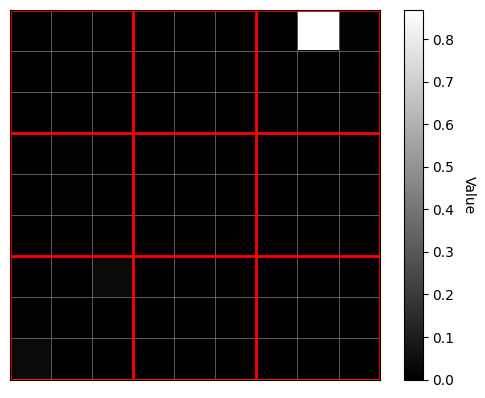

In [ ]:
plot_decision(output)

In [ ]:
act

tensor([[-3.8469, -4.0901, -3.0049, -6.4154, -6.2789, -3.2313, 12.6284,  3.1581,
         -4.1087, 17.3107,  4.8338,  4.0677,  8.8616,  0.4061, -9.5039, -3.1928,
          9.4770, -1.1651, -2.4598, -5.5176,  0.4859, -2.5524,  8.8480, -8.0125,
         -8.2501,  3.8759, -8.1452, 19.4170, -9.0446, -0.4754,  6.2053, -5.2970,
         -5.0432, -3.1562,  6.2707, -7.2221, -5.9767, -4.4399,  2.2936, -1.0297,
          1.9403, -4.3957, -6.5163, 14.3387, -9.2995,  5.4352,  9.5209, -5.6741,
         -0.6840, -1.9710,  9.7027, -9.1194,  0.2616, -0.3926, 12.3279,  6.5174,
         -0.0852, -4.4097, -8.9238, -7.9881,  0.2044, -6.8650,  4.2779, -1.6051,
         16.7232, -4.9737,  1.3008,  6.4196, 14.8033, -3.4474, 23.5811, -6.4737,
          0.0267, -1.9817, -4.8406, -4.3444, -4.5915, -7.5800, -1.6147, -5.2332,
          7.0029]])

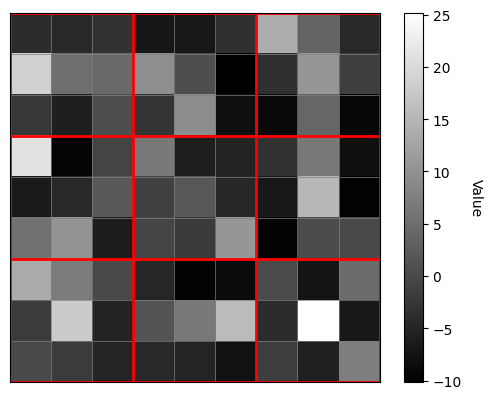

In [ ]:
plot_decision(act.reshape(9, 9))

In [1]:
from utils.board_utils import Rotation, Reflection

In [18]:
def check_inverse(name, fwd, inv, device="cpu"):
    t = torch.randn(2, 4, 9, 9, device=device)
    err = (inv(fwd(t)) - t).abs().max().item()
    print(name, "max|inv(fwd(t))-t| =", err)

# rotation
rot = Reflection(k=4)
check_inverse("rot k=1", rot.transform_batch, rot.inverse_transform_batch)
rot.k = 2
check_inverse("rot k=2", rot.transform_batch, rot.inverse_transform_batch)
rot.k = 3
check_inverse("rot k=3", rot.transform_batch, rot.inverse_transform_batch)
rot.k = 4
check_inverse("rot k=4", rot.transform_batch, rot.inverse_transform_batch)

rot k=1 max|inv(fwd(t))-t| = 0.0
rot k=2 max|inv(fwd(t))-t| = 0.0
rot k=3 max|inv(fwd(t))-t| = 0.0
rot k=4 max|inv(fwd(t))-t| = 0.0
